# Tutorial 05: Homework

### Assignement
  * For the attached data (cleaned data from the 3rd tutorial) try to use linear regression (or ridge regression, if you will) AND decision tree regressor (or boosted tree) applied on features given by PCA.
  * Try to select as less as possible features so that the results are comparably good (in terms of RMSLE) to the results obtained in the 3rd tutorial (RMSLE around 0.12).
  * Experiment with the feature selection:
    * Has removing indicator or discrete features a positive influence?
    * Are the first principal components always the best choice?

In [129]:
import pandas as pd
import numpy as np
import math
from scipy import stats
import math
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import matplotlib
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, recall_score
%matplotlib inline
matplotlib.style.use('ggplot')

In [130]:
# loading data
data = pd.read_csv('dataHW05.csv', index_col=0)
data.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,0,0,1,0,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,0,0,0,1,0,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,0,0,1,0,0,0,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,0,0,1,1,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,0,0,0,1,0,0,0,0,1,0


In [132]:
# spliting data to train and test datasets
dtrain, dtest = train_test_split(data, test_size=0.25, random_state=458)
X = dtrain.drop(['SalePrice'], axis = 1, errors = 'ignore')
y = dtrain.SalePrice
Xtest = dtest.drop(['SalePrice'], axis = 1, errors = 'ignore')
ytest = dtest.SalePrice

# PCA - transformation of domain

In [133]:
pca = PCA(n_components=2)
pca.fit_transform(X)

X_pca = pca.transform(X)
Xtest_pca = pca.transform(Xtest)
print("Weights of components (eigenvalues):")
print(pca.explained_variance_ratio_)
print("Components (eigenvectors):")
print(pca.components_)

Weights of components (eigenvalues):
[0.98395341 0.00466675]
Components (eigenvectors):
[[-1.27885028e-03 -7.84032386e-04  2.55835897e-04  9.99790517e-01
   1.30632021e-05 -8.95014838e-07  2.29723380e-05  5.20009333e-05
   1.72480696e-03  7.10717834e-03  1.78823614e-03  3.17963035e-04
   9.21337752e-03  9.97414002e-03  1.78484406e-03  6.51181947e-05
   1.18241023e-02  6.13023966e-06  1.60341691e-06  7.19294174e-06
   1.21451686e-07  1.08167345e-05 -3.51432696e-07  2.96095895e-05
   1.75599604e-05  3.57487984e-03  1.09760397e-05  3.29985008e-03
   1.29214622e-03  4.45648115e-04 -5.06115424e-05  7.59517804e-05
   2.66952896e-04  1.59425406e-04 -4.91551472e-07 -7.39726260e-07
   2.58578071e-03  3.54245034e-05  6.77431417e-05  1.58437580e-05
   1.74904034e-04  2.84505617e-05  6.52385495e-05  1.60091586e-05
   7.15696988e-06  3.24730333e-06  1.39862258e-04  1.01425642e-05
   1.41500755e-04  8.20336480e-06  2.87197796e-05  1.33075575e-06
   1.97499602e-06  2.62975853e-07  1.47768848e-04  7.5

# Linear Regression

In [134]:
#WITHOUT TRANSFORMED DOMAIN
clf1 = LinearRegression()
clf1.fit(X, y) 
RMSLE = np.sqrt(mean_squared_error(clf1.predict(Xtest), ytest))
print('Root mean squared logarithmic error - without PCA:', RMSLE)

#WITH
clf1.fit(X_pca, y)
RMSLE = np.sqrt(mean_squared_error(clf1.predict(Xtest_pca), ytest))
print('Root mean squared logarithmic error - with PCA:', RMSLE)

Root mean squared logarithmic error - without PCA: 0.22722511921268893
Root mean squared logarithmic error - with PCA: 0.31161557025799547


# DecisionTree Regressor

In [135]:
clf2 = DecisionTreeRegressor()
clf2.fit(X, y) 
RMSLE = np.sqrt(mean_squared_error(clf2.predict(Xtest), ytest))
print('Root mean squared logarithmic error - without PCA:', RMSLE)

#WITH
clf2.fit(X_pca, y)
RMSLE = np.sqrt(mean_squared_error(clf2.predict(Xtest_pca), ytest))
print('Root mean squared logarithmic error - with PCA:', RMSLE)

Root mean squared logarithmic error - without PCA: 0.2315196537478471
Root mean squared logarithmic error - with PCA: 0.31919491614015827


# Feature selection

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:13: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  del sys.path[0]
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  from ipykernel import kernelapp as app


Minimum for non-scaled - linear regreession: 0.190472
Minimum for scaled - linear regreession: 0.172954
Minimum for non-scaled - desicion tree regressor: 0.239485
Minimum for scaled - desicion tree regressor: 0.209111


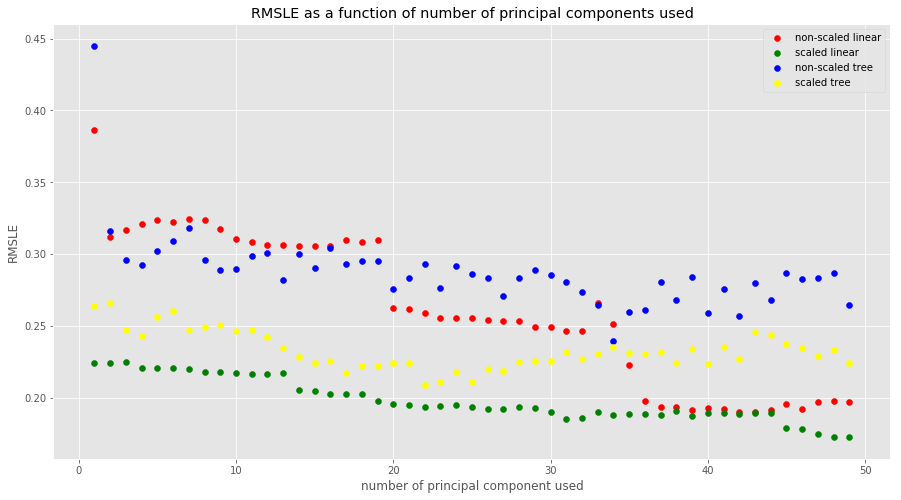

In [136]:
q = 50 # number of components

X = dtrain.drop(['SalePrice'], axis = 1, errors = 'ignore')
y = dtrain.SalePrice
Xtest = dtest.drop(['SalePrice'], axis = 1, errors = 'ignore')
ytest = dtest.SalePrice

pca = PCA()
pca.fit_transform(X)
X1 = pca.transform(X)
Xtest1 = pca.transform(Xtest)

pca.fit_transform(scale(X))
X2 = pca.transform(scale(X))
Xtest2 = pca.transform(scale(Xtest))
RMSLE_linear = []
RMSLE_scale_linear = []
RMSLE_tree = []
RMSLE_scale_tree = []
for n in range(1,q):
    Xsub1 = X1[:,0:n]
    Xsubtest1 = Xtest1[:,0:n]
    clf1 = LinearRegression()
    clf1.fit(Xsub1, y) 
    RMSLE_linear.append(np.sqrt(mean_squared_error(clf1.predict(Xsubtest1), ytest)))
    Xsub2 = X2[:,0:n]
    Xsubtest2 = Xtest2[:,0:n]
    clf1 = LinearRegression()
    clf1.fit(Xsub2, y)
    RMSLE_scale_linear.append(np.sqrt(mean_squared_error(clf1.predict(Xsubtest2), ytest)))
    
    Xsub1 = X1[:,0:n]
    Xsubtest1 = Xtest1[:,0:n]
    clf1 = DecisionTreeRegressor()
    clf1.fit(Xsub1, y) 
    RMSLE_tree.append(np.sqrt(mean_squared_error(clf1.predict(Xsubtest1), ytest)))
    Xsub2 = X2[:,0:n]
    Xsubtest2 = Xtest2[:,0:n]
    clf1 = DecisionTreeRegressor()
    clf1.fit(Xsub2, y)
    RMSLE_scale_tree.append(np.sqrt(mean_squared_error(clf1.predict(Xsubtest2), ytest)))
plt.subplots(1,1, figsize=(15, 8))
nsl = plt.scatter(range(1,q), RMSLE_linear, c='red')
sl = plt.scatter(range(1,q), RMSLE_scale_linear, c='green')
nst = plt.scatter(range(1,q), RMSLE_tree, c='blue')
st = plt.scatter(range(1,q), RMSLE_scale_tree, c='yellow')
plt.title(u"RMSLE as a function of number of principal components used")
plt.xlabel(u'number of principal component used')
plt.ylabel('RMSLE')
plt.legend((nsl,sl,nst,st),('non-scaled linear', 'scaled linear', 'non-scaled tree', 'scaled tree'))

print("Minimum for non-scaled - linear regreession: %f" %min(RMSLE_linear))
print("Minimum for scaled - linear regreession: %f" %min(RMSLE_scale_linear))
print("Minimum for non-scaled - desicion tree regressor: %f" %min(RMSLE_tree))
print("Minimum for scaled - desicion tree regressor: %f" %min(RMSLE_scale_tree))

# Experimental section 
## Has removing indicator or discrete features a positive influence?
Let's measure it. At first, remove all the indicators from the dataset, then continue in section PCA - tranformation of domain. Then, reload data, remove all discrete features from the dataset and again, continue in the section like you did last time. All the RMSLEs are summarized at the end of this section.

### Indicators

In [131]:
indicators = []
for col in data.columns:
    if data[col].nunique() <= 2:
        indicators.append(col)
print(indicators)
data = data.drop(indicators, axis=1) # uncomment to drop the selected columns

['HasMasVnrArea', 'HasBsmtFinSF1', 'HasBsmtFinSF2', 'HasBsmtUnfSF', 'HasTotalBsmtSF', 'Has2ndFlrSF', 'HasLowQualFinSF', 'HasGarageArea', 'HasWoodDeckSF', 'HasOpenPorchSF', 'HasPoolArea', 'MSZoning_C (all)', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'Street_Grvl', 'Street_Pave', 'LotShape_IR1', 'LotShape_IR2', 'LotShape_IR3', 'LotShape_Reg', 'LandContour_Bnk', 'LandContour_HLS', 'LandContour_Low', 'LandContour_Lvl', 'Utilities_AllPub', 'Utilities_NoSeWa', 'LotConfig_Corner', 'LotConfig_CulDSac', 'LotConfig_FR2', 'LotConfig_FR3', 'LotConfig_Inside', 'LandSlope_Gtl', 'LandSlope_Mod', 'LandSlope_Sev', 'Neighborhood_Blmngtn', 'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_BrkSide', 'Neighborhood_ClearCr', 'Neighborhood_CollgCr', 'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_Gilbert', 'Neighborhood_IDOTRR', 'Neighborhood_MeadowV', 'Neighborhood_Mitchel', 'Neighborhood_NAmes', 'Neighborhood_NPkVill', 'Neighborhood_NWAmes', 'Neighborhood_NoRidge'

### Discrete Features

In [115]:
discreteFeatures = data.select_dtypes(exclude=['float64']).columns;
print(discreteFeatures)

data = data.drop(discreteFeatures, axis=1) # uncomment to drop the selected columns

Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       ...
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=295)


## Summary of reached RMSLEs


| Non-scaled LR | Scaled LR | Non-scaled DTR | Scaled DTR | Scaled LR - WI | Scaled DTR - WI | Scaled LR - WDF | Scaled DTR - WDF |
|-|-|-|-|-|-|-|-|
|   0.187320  | 0.176786 | 0.248288 | 0.204121 | 0.172954 | 0.209111 | 0.208185 | 0.224979 | 0.265962 |

LR - linear regression<br>
DTR - decision tree regressor<br>
WI - without indicators<br>
WDF - without discretized features<br>

# Conclusion
Removing indicators helps to lower RMSLE only for linear regression.<br>
Removing discretized features does help to lower RMSLE, which is actually higher instead.